# 1º passo Gerar os dataset's 

• number of instances (rows in your dataset table) Bernardo  (2)

• number of classes (for multi-class classification problems) Ricardo (3)

• proportion of classes (balanced and imbalanced class problem) Ricardo (2)

• distribution of points within each class (shape of point clouds) Ricardo (3)

• shape of the border between the class regions, from linear to whatever Bernardo (3)

• level of noise André (3)

• level of overlap between the classes André (2)


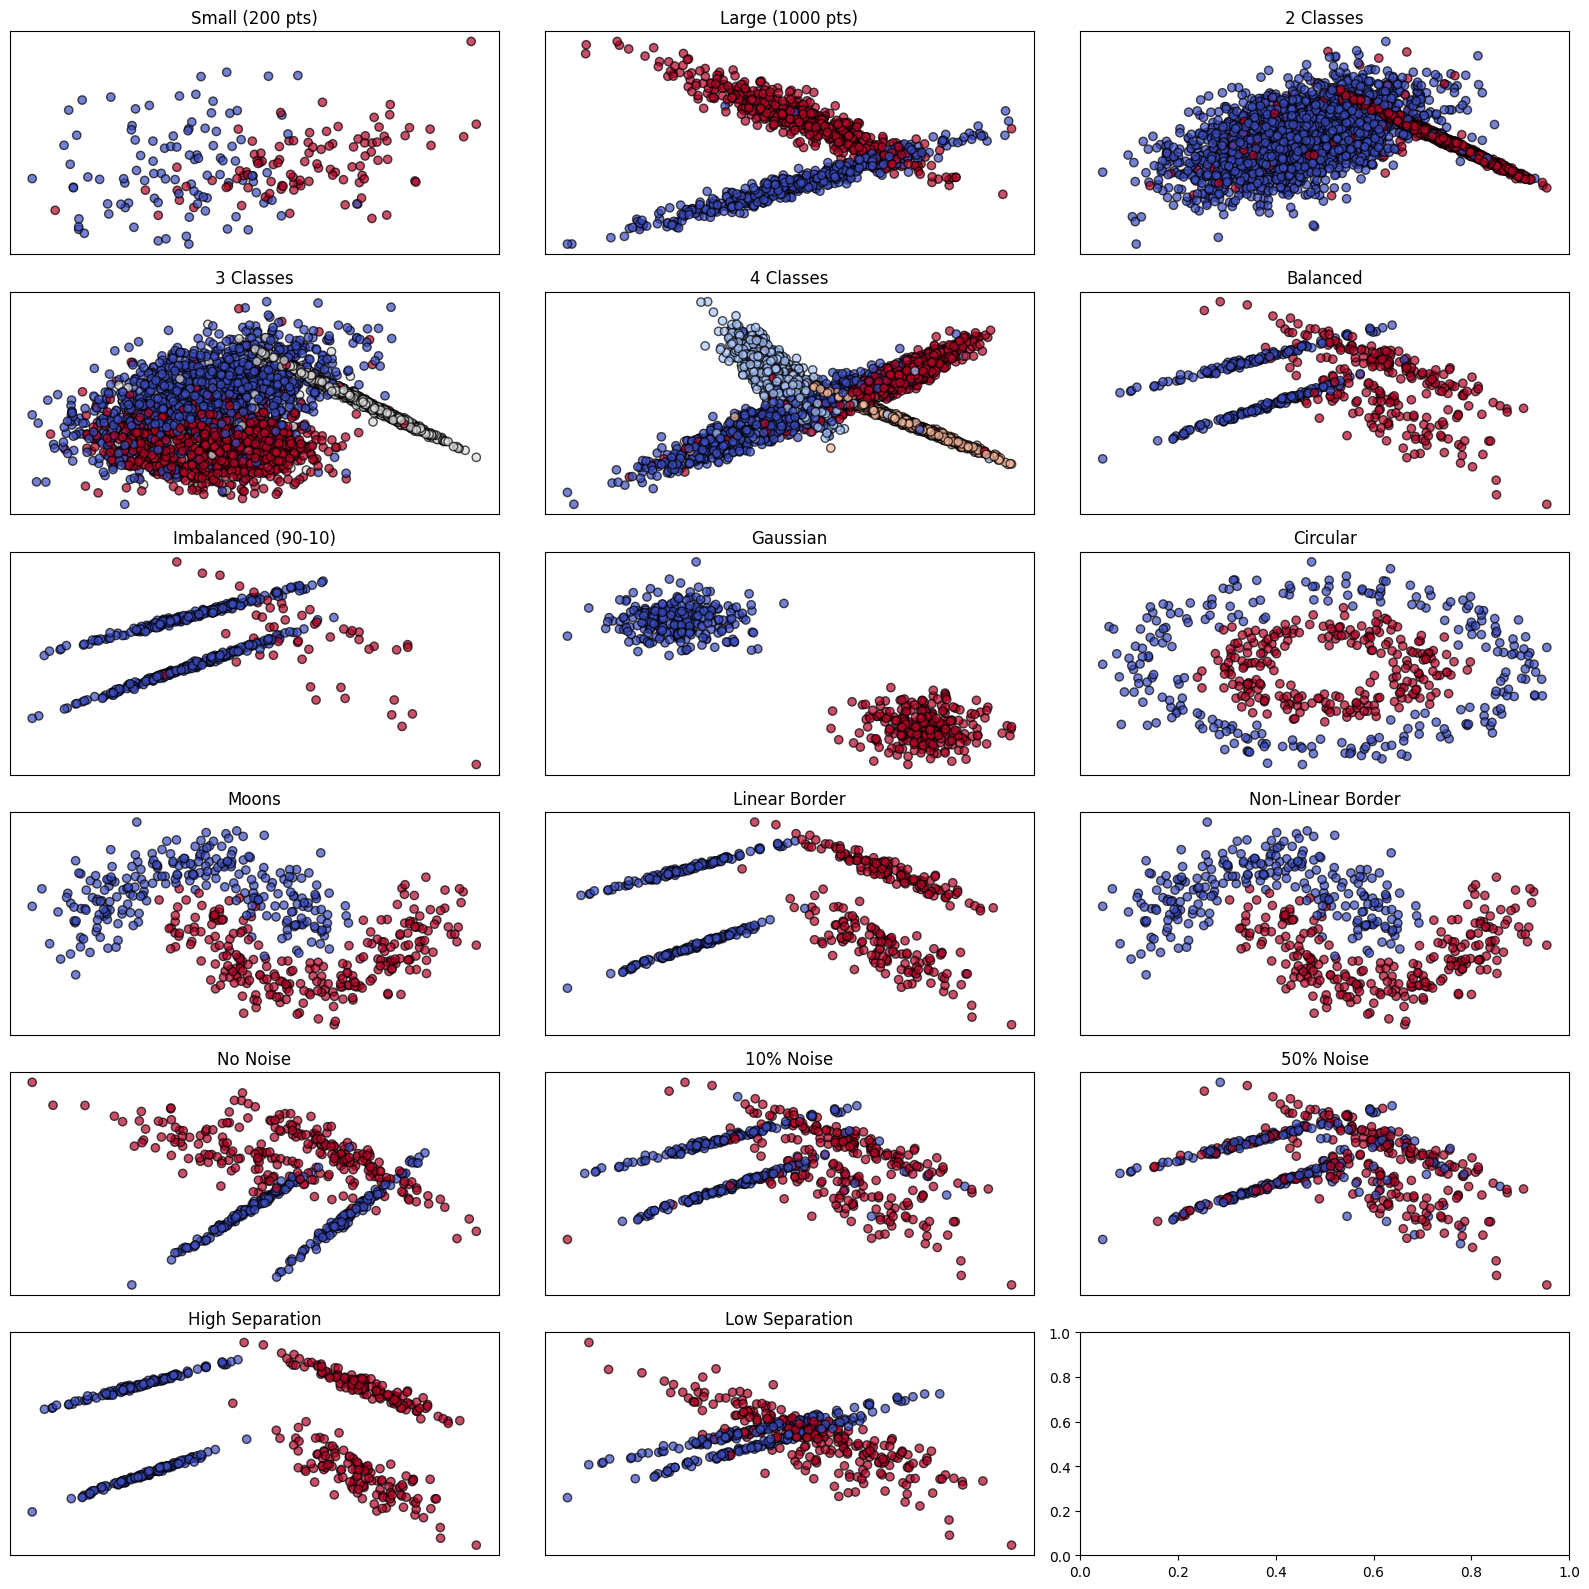

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix)
from sklearn.preprocessing import label_binarize


# Fixar seed para reprodutibilidade
np.random.seed(42)

# Lista de datasets
datasets = {}

# 1️⃣ Número de instâncias (pequeno e grande)
datasets["Small (200 pts)"] = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
datasets["Large (1000 pts)"] = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# 2️⃣ Número de classes (2, 3 e 4)
datasets["2 Classes"] = make_classification(n_samples=5000, n_features=2,shuffle=True, n_informative=2, n_redundant=0, n_clusters_per_class=1,class_sep=1, flip_y=0.1, random_state=42)
datasets["3 Classes"] = make_classification(n_samples=5000, n_features=2,shuffle=True, n_informative=2, n_redundant=0, n_clusters_per_class=1,class_sep=1, flip_y=0.1, n_classes=3, random_state=42)
datasets["4 Classes"] = make_classification(n_samples=5000, n_features=2,shuffle=True, n_informative=2, n_redundant=0, n_clusters_per_class=1,class_sep=1, flip_y=0.1, n_classes=4, random_state=42)

# 3️⃣ Proporção de classes (Balanceado e Desbalanceado)
datasets["Balanced"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, weights=[0.5, 0.5], random_state=42)
datasets["Imbalanced (90-10)"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, weights=[0.9, 0.1], random_state=42)

# 4️⃣ Distribuição dos pontos (Gaussian, Circular, Moons)
datasets["Gaussian"] = make_blobs(n_samples=500, centers=2, cluster_std=1.0, random_state=42)
datasets["Circular"] = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)
datasets["Moons"] = make_moons(n_samples=500, noise=0.2, random_state=42)

# 5️⃣ Forma da fronteira (Linear vs. Não Linear)
datasets["Linear Border"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, class_sep=2.0, random_state=42)
datasets["Non-Linear Border"] = make_moons(n_samples=500, noise=0.2, random_state=42)

# 6️⃣ Nível de Ruído (0, 10%, 30%)
datasets["No Noise"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, flip_y=0.0, random_state=42)
datasets["10% Noise"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, flip_y=0.1, random_state=42)
datasets["50% Noise"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, flip_y=0.5, random_state=42)

# 7️⃣ Sobreposição entre classes (Separação alta vs. baixa)
datasets["High Separation"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, class_sep=2.5, random_state=42)
datasets["Low Separation"] = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, class_sep=0.3, random_state=42)

# 📊 Visualizar os datasets
fig, axes = plt.subplots(6, 3, figsize=(16, 16))
for ax, (name, (X, y)) in zip(axes.flatten(), datasets.items()):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor='k', alpha=0.7)
    ax.set_title(name)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

# Separar datasets em treino e teste
datasets_train_test = {name: train_test_split(X, y, test_size=0.3, random_state=42) for name, (X, y) in datasets.items()}


 

Análise dos modelos nos datasets


📊 Evaluating Dataset: Small (200 pts) (Cross-Validation: 5-fold)
🔹 Decision Tree:
   ↪️ CV Accuracy: 0.79 ± 0.05
   ↪️ CV Precision: 0.80 ± 0.02
   ↪️ CV Recall: 0.79 ± 0.03
   ↪️ CV F1-score: 0.79 ± 0.05
🔹 Decision Tree (depth=2):
   ↪️ CV Accuracy: 0.82 ± 0.05
   ↪️ CV Precision: 0.84 ± 0.04
   ↪️ CV Recall: 0.82 ± 0.05
   ↪️ CV F1-score: 0.82 ± 0.05
🔹 Logistic Regression:
   ↪️ CV Accuracy: 0.84 ± 0.05
   ↪️ CV Precision: 0.85 ± 0.06
   ↪️ CV Recall: 0.84 ± 0.05
   ↪️ CV F1-score: 0.84 ± 0.05
🔹 LDA:
   ↪️ CV Accuracy: 0.84 ± 0.07
   ↪️ CV Precision: 0.85 ± 0.07
   ↪️ CV Recall: 0.84 ± 0.07
   ↪️ CV F1-score: 0.84 ± 0.07
🔹 QDA:
   ↪️ CV Accuracy: 0.85 ± 0.06
   ↪️ CV Precision: 0.86 ± 0.06
   ↪️ CV Recall: 0.85 ± 0.06
   ↪️ CV F1-score: 0.85 ± 0.06
🔹 SVM (linear):
   ↪️ CV Accuracy: 0.84 ± 0.07
   ↪️ CV Precision: 0.85 ± 0.07
   ↪️ CV Recall: 0.84 ± 0.07
   ↪️ CV F1-score: 0.84 ± 0.07
🔹 SVM (rbf):
   ↪️ CV Accuracy: 0.86 ± 0.05
   ↪️ CV Precision: 0.86 ± 0.05
   ↪️ CV Recall: 0.86 ±

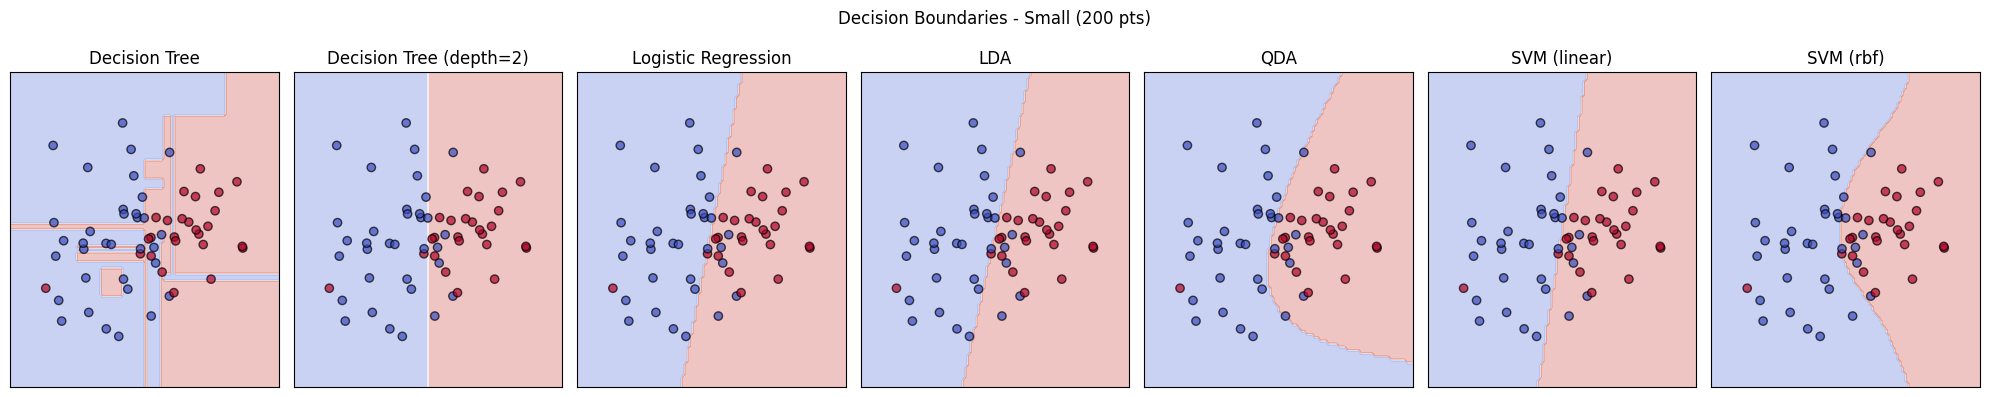

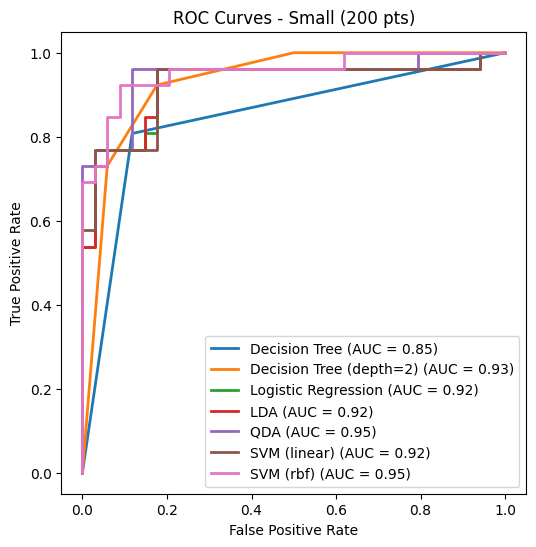

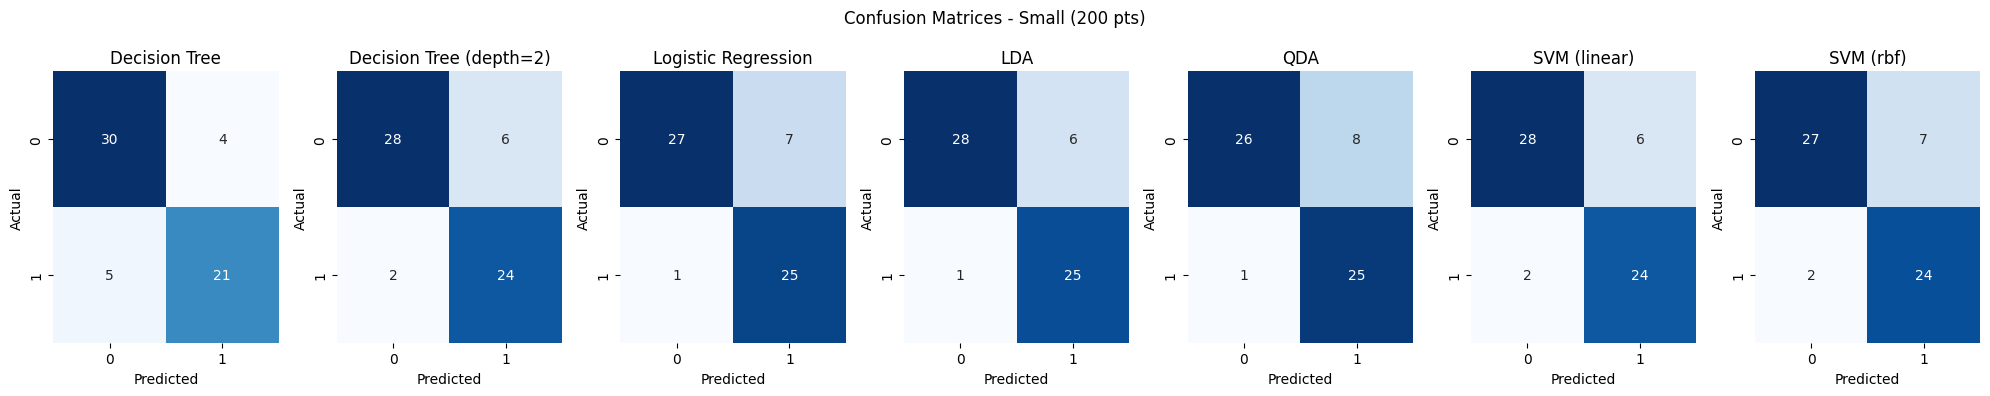

In [172]:

# Classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Decision Tree (depth=2)": DecisionTreeClassifier(max_depth=2),
    "Logistic Regression": LogisticRegression(),
    "LDA": LDA(),
    "QDA": QDA(),
    "SVM (linear)": SVC(kernel='linear', probability=True),
    "SVM (rbf)": SVC(kernel='rbf', probability=True)
}

# Function to plot decision boundaries for all models
def plot_decision_boundaries(models, X_test, y_test, dataset_name):
    fig, axes = plt.subplots(1, len(models), figsize=(20, 4))
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    for ax, (name, model) in zip(axes, models.items()):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", edgecolor='k', alpha=0.7)
        ax.set_title(name)
        ax.set_xticks([])
        ax.set_yticks([])

    plt.suptitle(f"Decision Boundaries - {dataset_name}")
    plt.tight_layout()
    plt.show()

# Function to plot all ROC curves in the same figure (skip multiclass)
def plot_roc_curves(models, X_test, y_test, dataset_name):
    if len(np.unique(y_test)) > 2:  # Check if dataset is multiclass
        print(f"⚠️ Skipping ROC Curve (Multiclass detected) for {dataset_name}")
        return
    
    plt.figure(figsize=(6, 6))
    
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")
              
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves - {dataset_name}")
    plt.legend(loc="lower right")
    plt.show()

# Function to plot all confusion matrices in the same figure
def plot_confusion_matrices(models, X_test, y_test, dataset_name):
    fig, axes = plt.subplots(1, len(models), figsize=(20, 4))
    
    for ax, (name, model) in zip(axes, models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, ax=ax)
        ax.set_title(name)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

    plt.suptitle(f"Confusion Matrices - {dataset_name}")
    plt.tight_layout()
    plt.show()


def evaluate_dataset(dataset_name, cv_folds=5):
    if dataset_name not in datasets_train_test:
        print(f"❌ Dataset '{dataset_name}' not found!")
        return

    X_train, X_test, y_train, y_test = datasets_train_test[dataset_name]
    print(f"\n📊 Evaluating Dataset: {dataset_name} (Cross-Validation: {cv_folds}-fold)")

    trained_models = {}
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Train and evaluate all classifiers
    for name, model in classifiers.items():
        # Cross-validation scores
        acc_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        prec_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='precision_weighted', error_score='raise')
        rec_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='recall_weighted', error_score='raise')
        f1_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1_weighted', error_score='raise')

        print(f"🔹 {name}:")
        print(f"   ↪️ CV Accuracy: {acc_scores.mean():.2f} ± {acc_scores.std():.2f}")
        print(f"   ↪️ CV Precision: {prec_scores.mean():.2f} ± {prec_scores.std():.2f}")
        print(f"   ↪️ CV Recall: {rec_scores.mean():.2f} ± {rec_scores.std():.2f}")
        print(f"   ↪️ CV F1-score: {f1_scores.mean():.2f} ± {f1_scores.std():.2f}")

        # Train final model on full training set
        model.fit(X_train, y_train)
        trained_models[name] = model

    # Generate plots with trained models
    plot_decision_boundaries(trained_models, X_test, y_test, dataset_name)
    plot_roc_curves(trained_models, X_test, y_test, dataset_name)
    plot_confusion_matrices(trained_models, X_test, y_test, dataset_name)

evaluate_dataset("Small (200 pts)", cv_folds=5)

Small (200pts)
    


📊 Evaluating Dataset: Low Separation (Cross-Validation: 5-fold)
🔹 Decision Tree:
   ↪️ CV Accuracy: 0.85 ± 0.02
   ↪️ CV Precision: 0.86 ± 0.04
   ↪️ CV Recall: 0.86 ± 0.02
   ↪️ CV F1-score: 0.85 ± 0.03
🔹 Decision Tree (depth=2):
   ↪️ CV Accuracy: 0.86 ± 0.03
   ↪️ CV Precision: 0.89 ± 0.02
   ↪️ CV Recall: 0.86 ± 0.03
   ↪️ CV F1-score: 0.86 ± 0.03
🔹 Logistic Regression:
   ↪️ CV Accuracy: 0.67 ± 0.04
   ↪️ CV Precision: 0.68 ± 0.04
   ↪️ CV Recall: 0.67 ± 0.04
   ↪️ CV F1-score: 0.67 ± 0.04
🔹 LDA:
   ↪️ CV Accuracy: 0.68 ± 0.04
   ↪️ CV Precision: 0.69 ± 0.03
   ↪️ CV Recall: 0.68 ± 0.04
   ↪️ CV F1-score: 0.68 ± 0.04
🔹 QDA:
   ↪️ CV Accuracy: 0.90 ± 0.04
   ↪️ CV Precision: 0.91 ± 0.02
   ↪️ CV Recall: 0.90 ± 0.04
   ↪️ CV F1-score: 0.90 ± 0.04
🔹 SVM (linear):
   ↪️ CV Accuracy: 0.69 ± 0.06
   ↪️ CV Precision: 0.72 ± 0.06
   ↪️ CV Recall: 0.69 ± 0.06
   ↪️ CV F1-score: 0.68 ± 0.06
🔹 SVM (rbf):
   ↪️ CV Accuracy: 0.85 ± 0.04
   ↪️ CV Precision: 0.89 ± 0.02
   ↪️ CV Recall: 0.85 ± 

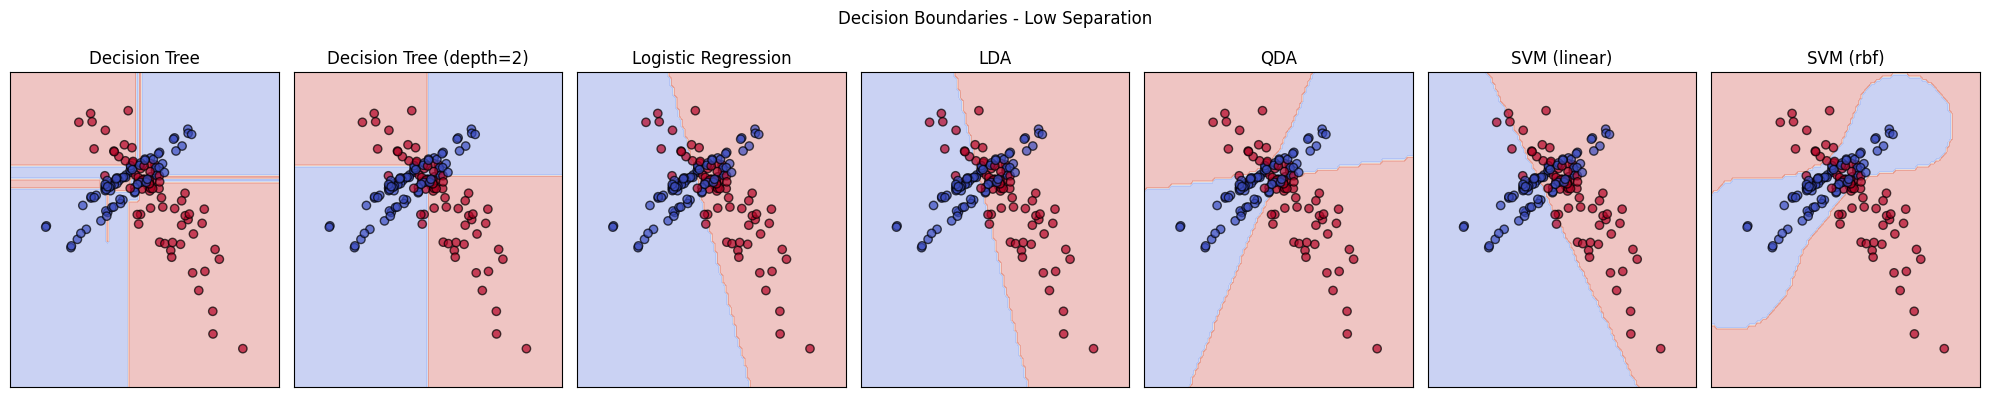

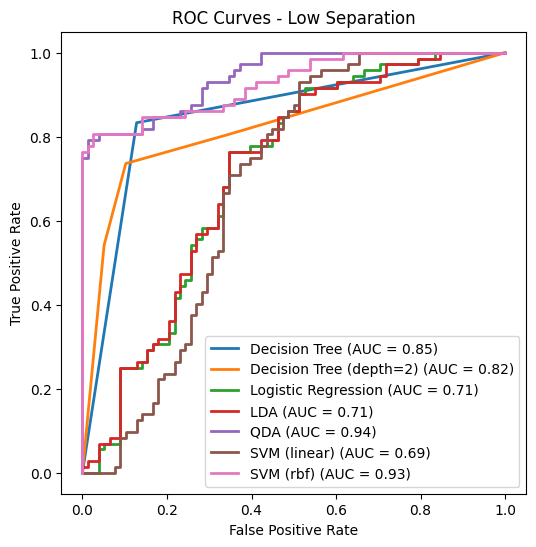

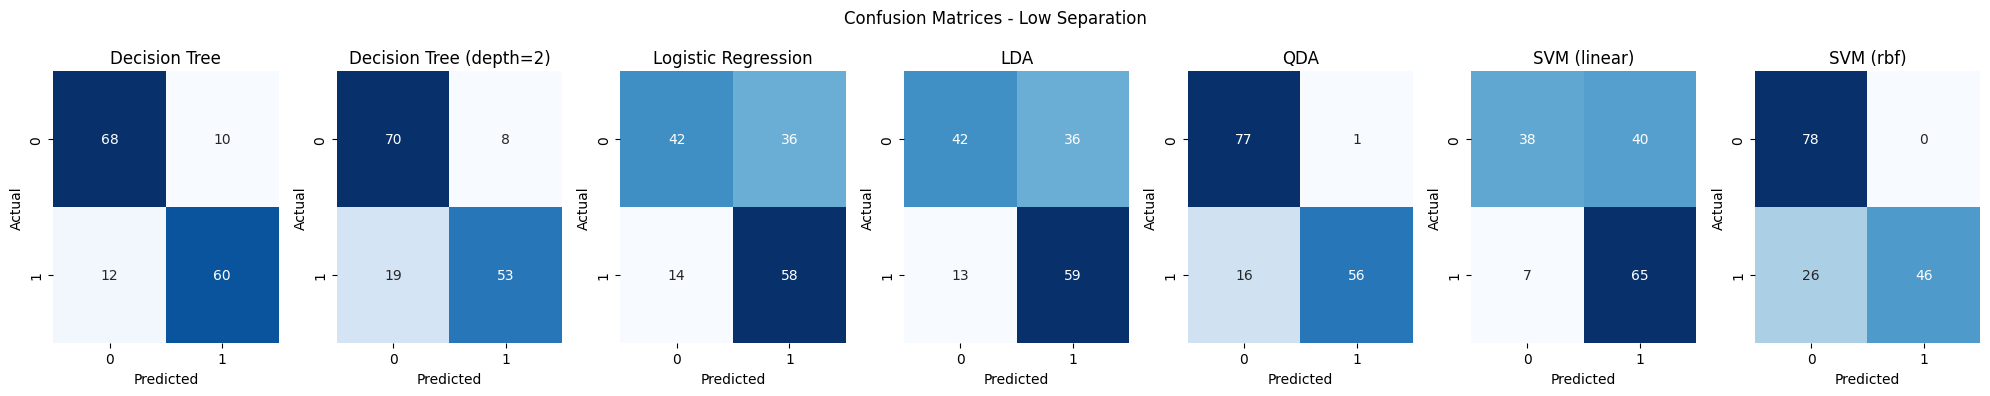

In [173]:

evaluate_dataset("Low Separation")   

Number of Classes 


📊 Evaluating Dataset: 2 Classes (Cross-Validation: 5-fold)
🔹 Decision Tree:
   ↪️ CV Accuracy: 0.89 ± 0.01
   ↪️ CV Precision: 0.89 ± 0.01
   ↪️ CV Recall: 0.88 ± 0.01
   ↪️ CV F1-score: 0.89 ± 0.01
🔹 Decision Tree (depth=2):
   ↪️ CV Accuracy: 0.90 ± 0.01
   ↪️ CV Precision: 0.91 ± 0.01
   ↪️ CV Recall: 0.90 ± 0.01
   ↪️ CV F1-score: 0.90 ± 0.01
🔹 Logistic Regression:
   ↪️ CV Accuracy: 0.89 ± 0.01
   ↪️ CV Precision: 0.89 ± 0.01
   ↪️ CV Recall: 0.89 ± 0.01
   ↪️ CV F1-score: 0.89 ± 0.01
🔹 LDA:
   ↪️ CV Accuracy: 0.88 ± 0.01
   ↪️ CV Precision: 0.88 ± 0.01
   ↪️ CV Recall: 0.88 ± 0.01
   ↪️ CV F1-score: 0.88 ± 0.01
🔹 QDA:
   ↪️ CV Accuracy: 0.89 ± 0.01
   ↪️ CV Precision: 0.90 ± 0.01
   ↪️ CV Recall: 0.89 ± 0.01
   ↪️ CV F1-score: 0.89 ± 0.01
🔹 SVM (linear):
   ↪️ CV Accuracy: 0.89 ± 0.01
   ↪️ CV Precision: 0.89 ± 0.01
   ↪️ CV Recall: 0.89 ± 0.01
   ↪️ CV F1-score: 0.89 ± 0.01
🔹 SVM (rbf):
   ↪️ CV Accuracy: 0.91 ± 0.01
   ↪️ CV Precision: 0.91 ± 0.01
   ↪️ CV Recall: 0.91 ± 0.01


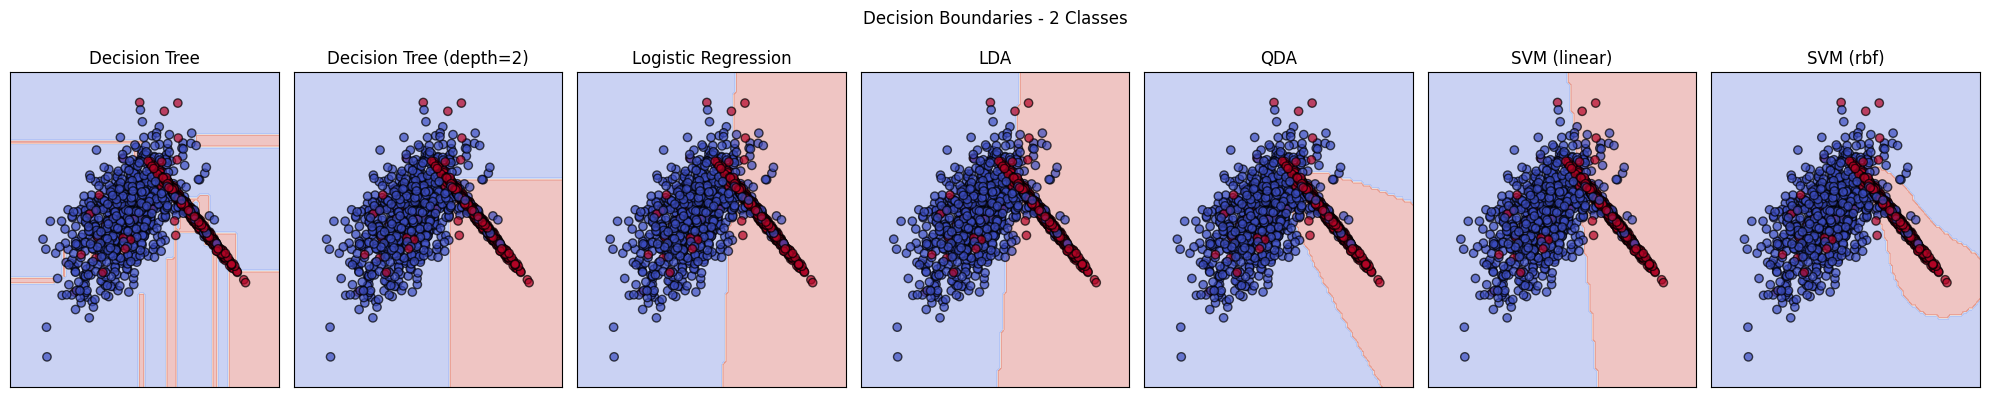

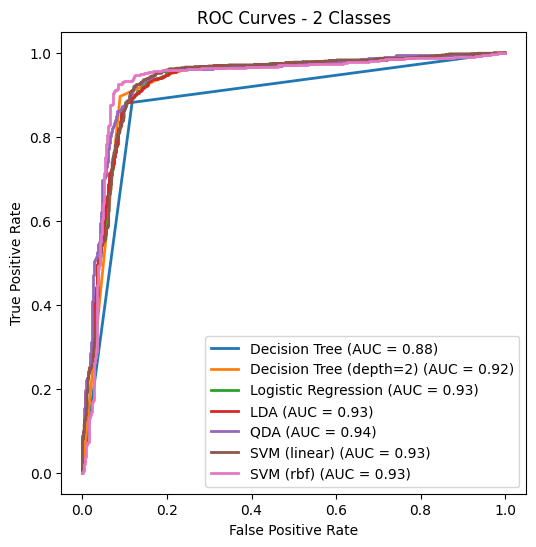

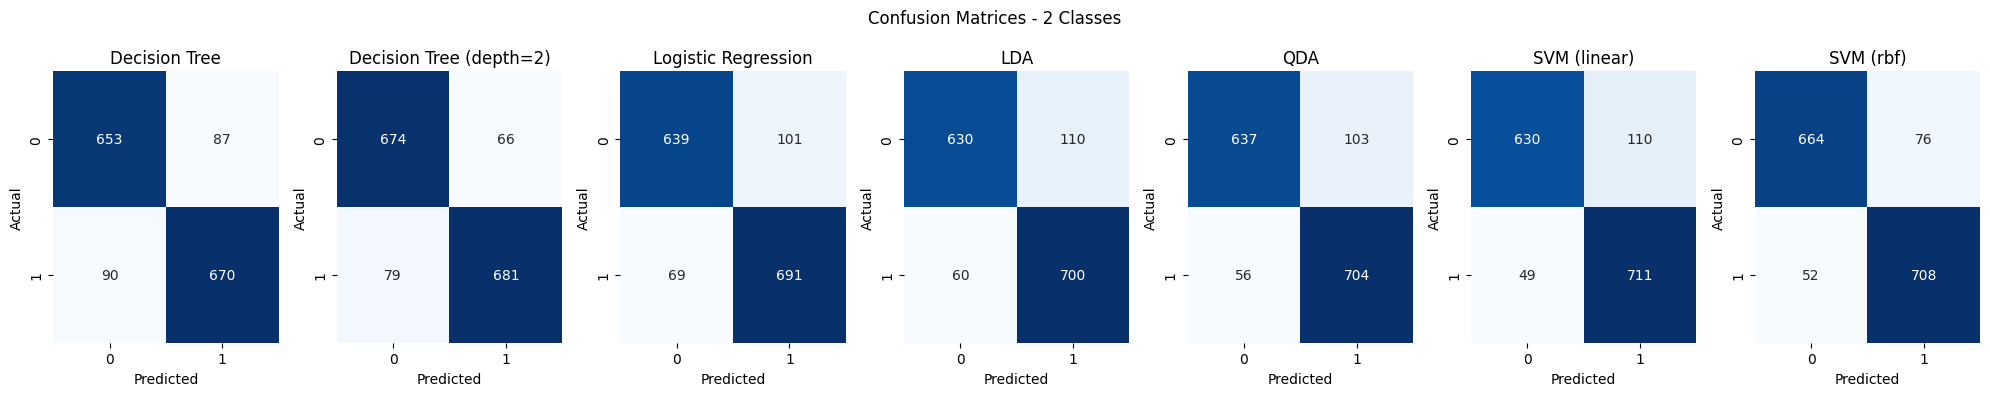

In [174]:
evaluate_dataset("2 Classes")   


📊 Evaluating Dataset: 3 Classes (Cross-Validation: 5-fold)
🔹 Decision Tree:
   ↪️ CV Accuracy: 0.75 ± 0.02
   ↪️ CV Precision: 0.75 ± 0.02
   ↪️ CV Recall: 0.76 ± 0.02
   ↪️ CV F1-score: 0.75 ± 0.02
🔹 Decision Tree (depth=2):
   ↪️ CV Accuracy: 0.80 ± 0.01
   ↪️ CV Precision: 0.80 ± 0.01
   ↪️ CV Recall: 0.80 ± 0.01
   ↪️ CV F1-score: 0.79 ± 0.01
🔹 Logistic Regression:
   ↪️ CV Accuracy: 0.81 ± 0.01
   ↪️ CV Precision: 0.80 ± 0.01
   ↪️ CV Recall: 0.81 ± 0.01
   ↪️ CV F1-score: 0.80 ± 0.01
🔹 LDA:
   ↪️ CV Accuracy: 0.80 ± 0.00
   ↪️ CV Precision: 0.80 ± 0.01
   ↪️ CV Recall: 0.80 ± 0.00
   ↪️ CV F1-score: 0.80 ± 0.00
🔹 QDA:
   ↪️ CV Accuracy: 0.81 ± 0.01
   ↪️ CV Precision: 0.81 ± 0.01
   ↪️ CV Recall: 0.81 ± 0.01
   ↪️ CV F1-score: 0.81 ± 0.01
🔹 SVM (linear):
   ↪️ CV Accuracy: 0.81 ± 0.00
   ↪️ CV Precision: 0.81 ± 0.00
   ↪️ CV Recall: 0.81 ± 0.00
   ↪️ CV F1-score: 0.81 ± 0.00
🔹 SVM (rbf):
   ↪️ CV Accuracy: 0.83 ± 0.01
   ↪️ CV Precision: 0.83 ± 0.01
   ↪️ CV Recall: 0.83 ± 0.01


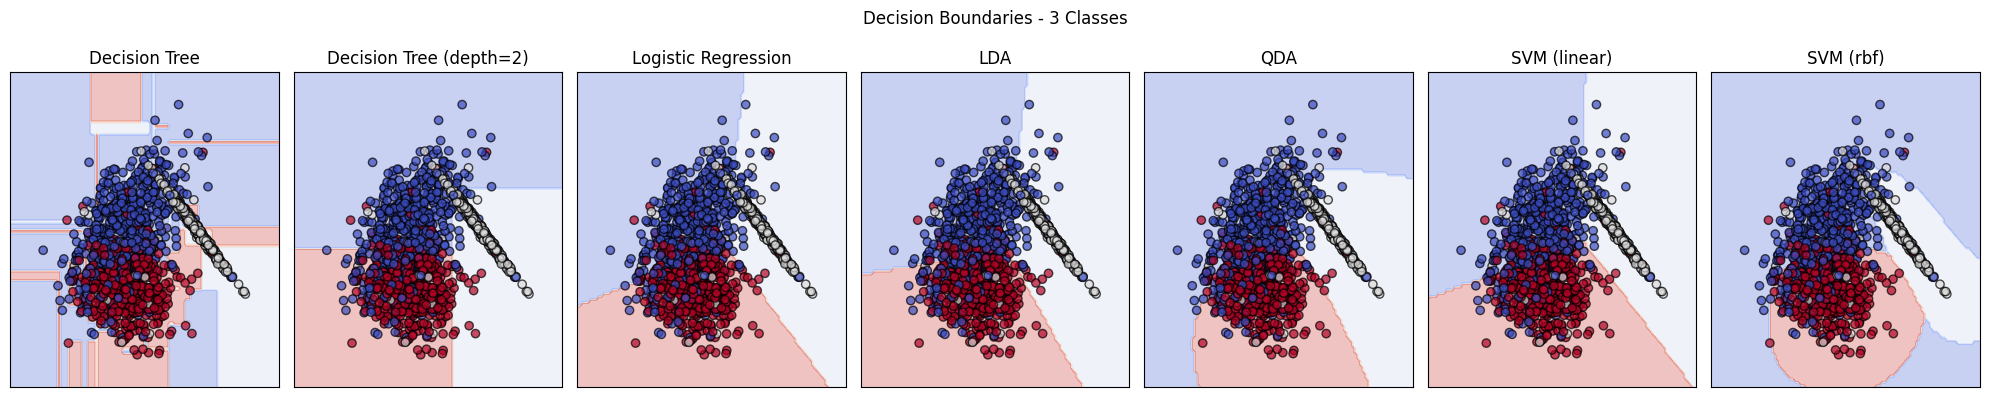

⚠️ Skipping ROC Curve (Multiclass detected) for 3 Classes


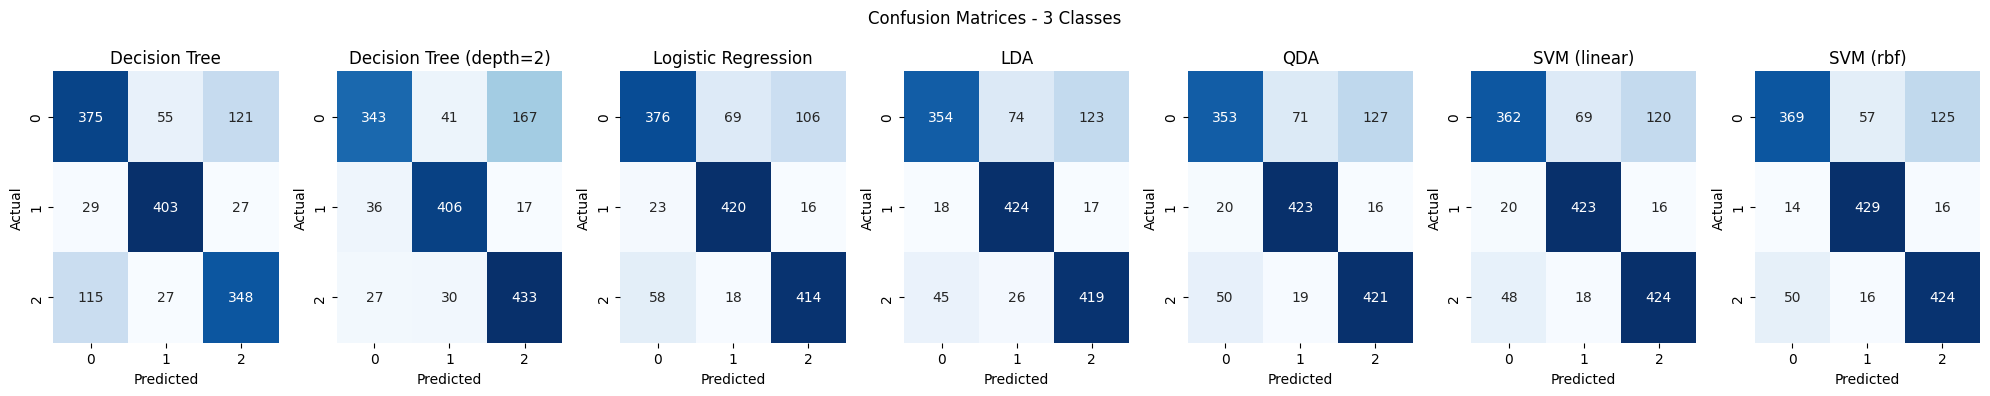

In [175]:
evaluate_dataset("3 Classes")   



📊 Evaluating Dataset: 4 Classes (Cross-Validation: 5-fold)
🔹 Decision Tree:
   ↪️ CV Accuracy: 0.75 ± 0.02
   ↪️ CV Precision: 0.75 ± 0.02
   ↪️ CV Recall: 0.75 ± 0.01
   ↪️ CV F1-score: 0.75 ± 0.02
🔹 Decision Tree (depth=2):
   ↪️ CV Accuracy: 0.79 ± 0.01
   ↪️ CV Precision: 0.79 ± 0.01
   ↪️ CV Recall: 0.79 ± 0.01
   ↪️ CV F1-score: 0.79 ± 0.01
🔹 Logistic Regression:
   ↪️ CV Accuracy: 0.80 ± 0.01
   ↪️ CV Precision: 0.80 ± 0.01
   ↪️ CV Recall: 0.80 ± 0.01
   ↪️ CV F1-score: 0.80 ± 0.01
🔹 LDA:
   ↪️ CV Accuracy: 0.80 ± 0.01
   ↪️ CV Precision: 0.80 ± 0.01
   ↪️ CV Recall: 0.80 ± 0.01
   ↪️ CV F1-score: 0.80 ± 0.01
🔹 QDA:
   ↪️ CV Accuracy: 0.81 ± 0.01
   ↪️ CV Precision: 0.81 ± 0.01
   ↪️ CV Recall: 0.81 ± 0.01
   ↪️ CV F1-score: 0.81 ± 0.01
🔹 SVM (linear):
   ↪️ CV Accuracy: 0.79 ± 0.01
   ↪️ CV Precision: 0.80 ± 0.01
   ↪️ CV Recall: 0.79 ± 0.01
   ↪️ CV F1-score: 0.79 ± 0.01
🔹 SVM (rbf):
   ↪️ CV Accuracy: 0.82 ± 0.01
   ↪️ CV Precision: 0.82 ± 0.01
   ↪️ CV Recall: 0.82 ± 0.01


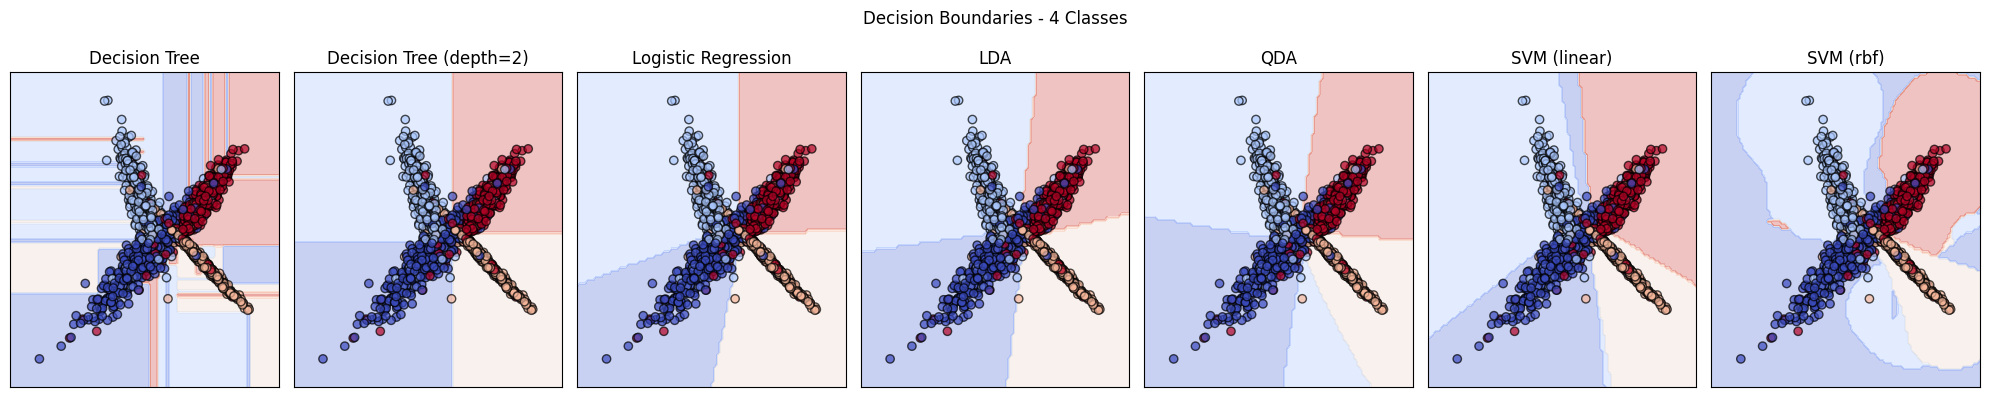

⚠️ Skipping ROC Curve (Multiclass detected) for 4 Classes


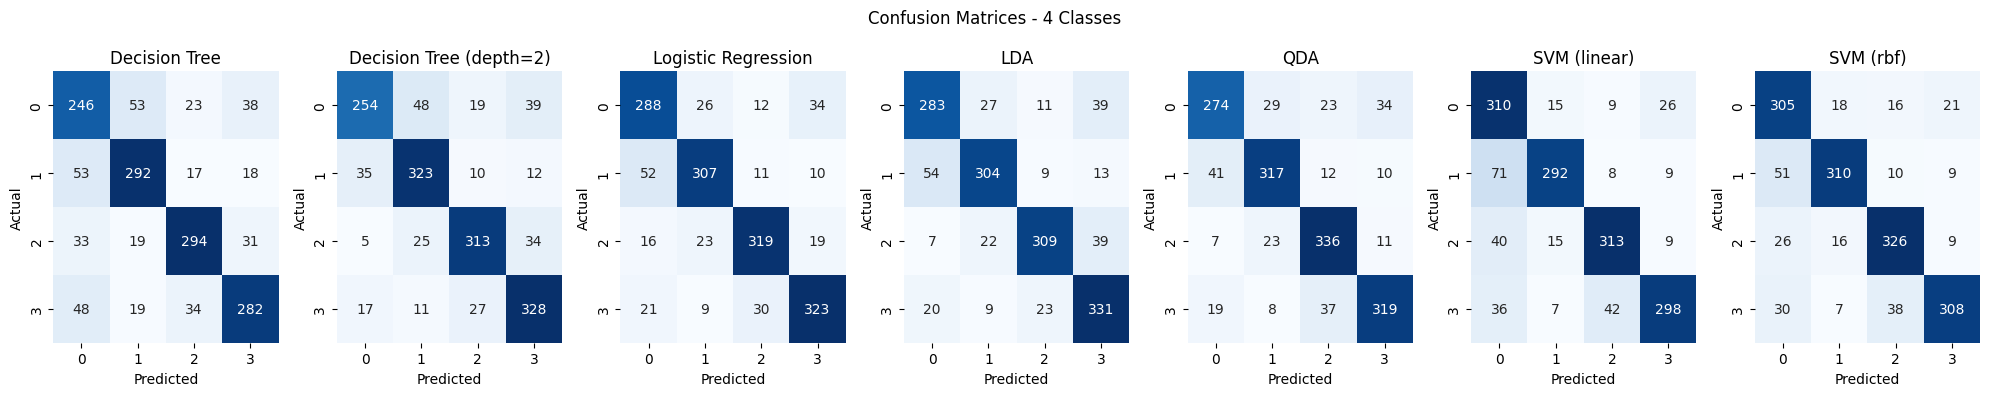

In [176]:
evaluate_dataset("4 Classes")   
